___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 05 & 06</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Groupby & Useful Operations</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [BASIC AGGREGATION METHODS](#1)
* [GROUPBY & AGGREGATION](#2)
    * [DataFrame.groupby()](#2.1)
* [DATAFRAME/SERIES OPERATIONS](#3)
    * [.aggregate()/agg()](#3.1)
        * [DataFrame.agg()](#3.1.1)
        * [DataFrame.groupby().agg()](#3.1.2)
    * [.filter()](#3.2)
        * [DataFrame.groupby().filter()](#3.2.1)
    * [.transform()](#3.3)
        * [DataFrame.groupby().transform()](#3.3.1)
    * [.apply()](#3.4)
        * [Series.apply() - df["col"].apply()](#3.4.1)
        * [DataFrame.apply()](#3.4.2)
    * [.applymap()](#3.5)
    * [.map()](#3.6)
        * [Series.map() - df["col"].map()](#3.6.1)
        * [DataFrame.map()](#3.6.2)
    * [df.transform() vs df.apply()](#3.7)
* [pivot() vs pivot_table()](#8)
* [.stack() & .unstack()](#9)
    * [.stack()](#9.1)
    * [.unstack()](#9.2)
* [THE END OF THE SESSION - 05 & 06](#10)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy you can import it as a library:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Basic Aggregation Methods</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

One of the most basic analysis functions is grouping and aggregating data. In some cases, this level of analysis may be sufficient to answer real-world/business questions. In other instances, this activity might be the first step in a more complex data science analysis. In pandas, the groupby function can be combined with one or more aggregation functions to quickly and easily summarize data. This concept is deceptively simple and most new pandas users will understand this concept. However, they might be surprised at how useful complex aggregation functions can be for supporting sophisticated analysis [Source](https://pbpython.com/groupby-agg.html).

An essential piece of analysis of large data is efficient summarization: computing aggregations, such as ``sum()``, ``mean()``, ``median()``, ``min()``, and ``max()``, in which a single number gives insight into the nature of a potentially large dataset. The aggregate() method allows you to apply a function or a list of function names to be executed along one of the axis of the DataFrame, default 0, which is the index (row) axis [Source](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html).

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question. Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays which are also used for Pandas Dataframes [Pandas Official Documentation](https://pandas.pydata.org/docs/reference/frame.html); we'll discuss and demonstrate some of them here:

* ``count()`` ==> Counts non-NA cells for each column or row.
* ``mean()`` ==> Returns the mean of the values over the requested axis.
* ``median()`` ==> Returns the median of the values over the requested axis.
* ``min()`` ==> Returns the minimum of the values over the requested axis.
* ``max()`` ==> Returns the maximum of the values over the requested axis.
* ``std()`` ==> Returns sample standard deviation over requested axis.
* ``var()`` ==> Returns unbiased variance over requested axis.
* ``sum()`` ==> Returns the sum of the values over the requested axis.
* ``idxmin()`` ==> Returns index of first occurrence of minimum over requested axis.
* ``idxmax()`` ==> Returns index of first occurrence of maximum over requested axis.
* ``corr()`` ==> Computes pairwise correlation of columns, excluding NA/null values.

To sum up, in this session, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a groupby.

In [2]:
df = pd.DataFrame([[1,2,3],
                 [4,5,6],
                 [7,8,9],
                 [np.nan, np.nan, np.nan]], 
                 columns = ["A", "B", "C"])

df

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [3]:
df.agg(["sum", "min"])

,A,B,C
sum,12.0,15.0,18.0
min,1.0,2.0,3.0


In [4]:
df.agg("sum")

A    12.0
B    15.0
C    18.0
dtype: float64

In [5]:
type(df.agg("sum"))

pandas.core.series.Series

In [6]:
df.agg(["sum"])

,A,B,C
sum,12.0,15.0,18.0


In [7]:
df.agg({"A" : ["sum", "min"],
       "B" : ["min", "max"]
       })

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


In [8]:
df.agg(x = ("A", max), 
      y = ("B", "min"),
      z = ("C", np.mean)
      )

,A,B,C
x,7.0,NaN,NaN
y,NaN,2.0,NaN
z,NaN,NaN,6.0


In [9]:
df.agg("mean", axis=1)

0    2.0
1    5.0
2    8.0
3    NaN
dtype: float64

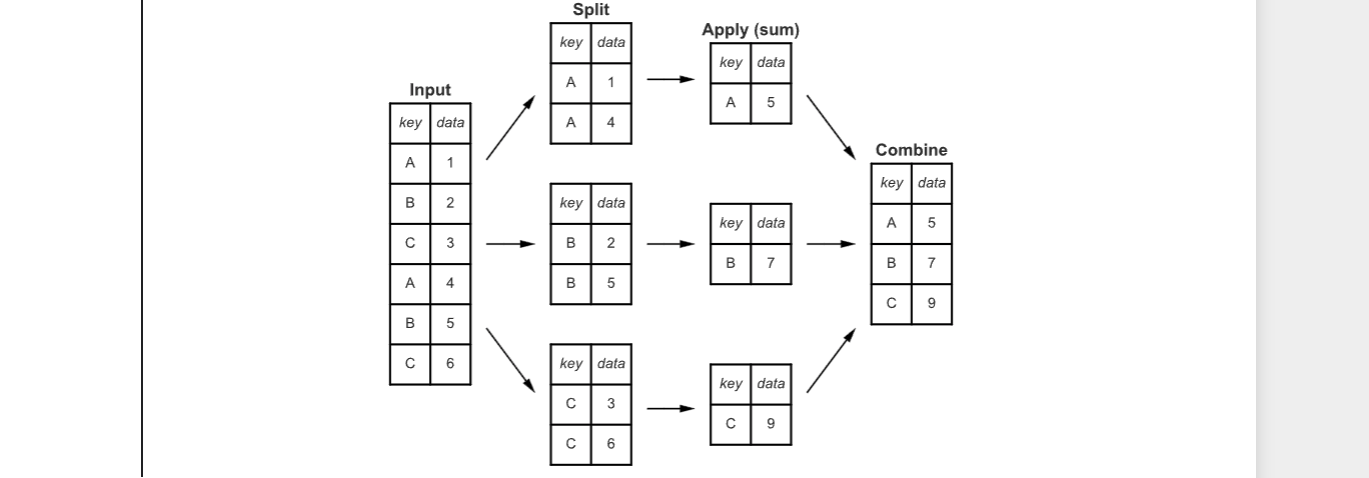

In [10]:
df = pd.DataFrame([[1,1,0.362],
                 [1,2, 0.227],
                 [2,3,1.267],
                 [2,4,-0.562]], 
                 columns = ["A", "B", "C"])

df

,A,B,C
0,1,1,0.362
1,1,2,0.227
2,2,3,1.267
3,2,4,-0.562


In [11]:
df.groupby("A").agg(min)

,B,C
A,,
1,1,0.227
2,3,-0.562


In [12]:
df["B"]

0    1
1    2
2    3
3    4
Name: B, dtype: int64

In [13]:
df.groupby("A")["B"].agg(min)

A
1    1
2    3
Name: B, dtype: int64

In [14]:
df.groupby("A").agg([min, max])

B          C       
  min max    min    max
A                      
1   1   2  0.227  0.362
2   3   4 -0.562  1.267

In [15]:
df.groupby("A").agg({"B" : ["min", max], 
                     "C" : sum})

B          C
  min max    sum
A               
1   1   2  0.589
2   3   4  0.705

In [16]:
df = pd.DataFrame(np.random.randint(0, 100, size=(7, 5)), 
                  columns=["x1", "x2", "x3", "x4", "x5"])
df

,x1,x2,x3,x4,x5
0,52,13,93,0,52
1,37,99,17,41,32
2,38,68,43,30,9
3,87,1,5,34,29
4,7,74,61,30,73
5,40,24,79,54,40
6,89,12,41,40,78


In [17]:
df.count()

x1    7
x2    7
x3    7
x4    7
x5    7
dtype: int64

In [18]:
df['x1']

0    52
1    37
2    38
3    87
4     7
5    40
6    89
Name: x1, dtype: int32

In [19]:
df['x1'].count()

7

In [20]:
df.mean()

x1    50.000000
x2    41.571429
x3    48.428571
x4    32.714286
x5    44.714286
dtype: float64

In [21]:
dfNaN = pd.DataFrame([[1,2,3],
                 [4,5,6],
                 [7,8,9],
                 [np.nan, np.nan, np.nan]], 
                 columns = ["A", "B", "C"])
dfNaN

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [22]:
dfNaN.mean(skipna=False)

A   NaN
B   NaN
C   NaN
dtype: float64

In [23]:
np.NaN * 0

nan

In [24]:
np.NaN / 1

nan

In [25]:
np.nan + 10

nan

In [26]:
df.x2.mean()

41.57142857142857

In [27]:
df.median()

x1    40.0
x2    24.0
x3    43.0
x4    34.0
x5    40.0
dtype: float64

In [28]:
df.x3.median()

43.0

In [29]:
df.min()

x1    7
x2    1
x3    5
x4    0
x5    9
dtype: int32

In [30]:
df.x4.min()

0

In [31]:
df

,x1,x2,x3,x4,x5
0,52,13,93,0,52
1,37,99,17,41,32
2,38,68,43,30,9
3,87,1,5,34,29
4,7,74,61,30,73
5,40,24,79,54,40
6,89,12,41,40,78


In [32]:
df.idxmin()

# df.argmin()
# # Raises an error of "AttributeError: 'DataFrame' object has no attribute 'argmin'""

x1    4
x2    3
x3    3
x4    0
x5    2
dtype: int64

In [33]:
# df.argmin()

In [34]:
df.x5.idxmin()

#df.x5.argmin()

2

In [35]:
df.x5.argmin()

2

In [36]:
df.idxmax()

x1    6
x2    1
x3    0
x4    5
x5    6
dtype: int64

In [37]:
df

,x1,x2,x3,x4,x5
0,52,13,93,0,52
1,37,99,17,41,32
2,38,68,43,30,9
3,87,1,5,34,29
4,7,74,61,30,73
5,40,24,79,54,40
6,89,12,41,40,78


In [38]:
df.idxmin()

x1    4
x2    3
x3    3
x4    0
x5    2
dtype: int64

In [39]:
df.loc[df.idxmin()]

,x1,x2,x3,x4,x5
4,7,74,61,30,73
3,87,1,5,34,29
3,87,1,5,34,29
0,52,13,93,0,52
2,38,68,43,30,9


In [40]:
df.loc[df.idxmin(), "x5"]

4    73
3    29
3    29
0    52
2     9
Name: x5, dtype: int32

Pandas dataframe.idxmin() function returns index of first occurrence of minimum over requested axis. While finding the index of the minimum value across any index, all NA/null values are excluded.

In [41]:
df.std(axis = 0)

x1    29.314388
x2    38.065107
x3    31.722007
x4    16.640456
x5    24.723230
dtype: float64

In [42]:
df[["x1", "x2"]]

,x1,x2
0,52,13
1,37,99
2,38,68
3,87,1
4,7,74
5,40,24
6,89,12


In [43]:
df[["x1", "x2"]].std()

x1    29.314388
x2    38.065107
dtype: float64

In [44]:
df.var()

x1     859.333333
x2    1448.952381
x3    1006.285714
x4     276.904762
x5     611.238095
dtype: float64

In [45]:
df[["x1", "x2"]].var()

x1     859.333333
x2    1448.952381
dtype: float64

In [46]:
df.sum(axis=0)

x1    350
x2    291
x3    339
x4    229
x5    313
dtype: int64

In [47]:
df

,x1,x2,x3,x4,x5
0,52,13,93,0,52
1,37,99,17,41,32
2,38,68,43,30,9
3,87,1,5,34,29
4,7,74,61,30,73
5,40,24,79,54,40
6,89,12,41,40,78


In [48]:
df.sum(axis=1)

0    210
1    226
2    188
3    156
4    245
5    237
6    260
dtype: int64

In [49]:
df.x1.sum()

350

In [50]:
df.describe()

,x1,x2,x3,x4,x5
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,50.000000,41.571429,48.428571,32.714286,44.714286
std,29.314388,38.065107,31.722007,16.640456,24.723230
min,7.000000,1.000000,5.000000,0.000000,9.000000
25%,37.500000,12.500000,29.000000,30.000000,30.500000
50%,40.000000,24.000000,43.000000,34.000000,40.000000
75%,69.500000,71.000000,70.000000,40.500000,62.500000
max,89.000000,99.000000,93.000000,54.000000,78.000000


In [51]:
# df.describe().transpose()

df.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,7.0,50.000000,29.314388,7.0,37.5,40.0,69.5,89.0
x2,7.0,41.571429,38.065107,1.0,12.5,24.0,71.0,99.0
x3,7.0,48.428571,31.722007,5.0,29.0,43.0,70.0,93.0
x4,7.0,32.714286,16.640456,0.0,30.0,34.0,40.5,54.0
x5,7.0,44.714286,24.723230,9.0,30.5,40.0,62.5,78.0


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Groupby & Aggregation</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In Exploratory Data Analysis (EDA), we often would like to analyze data by some categories. In SQL, the GROUP BY statement groups row that has the same category values into summary rows. In Pandas, SQL's GROUP BY operation is performed using the similarly named **``groupby()``** method. Pandas' groupby() allows us to split data into separate groups to perform computations for better analysis [Source](https://towardsdatascience.com/all-pandas-groupby-you-should-know-for-grouping-data-and-performing-operations-2a8ec1327b5).

In this part of the session, you'll learn the "group by" process (split-apply-combine) and how to use Pandas's groupby() function to group data and perform operations.

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.groupby()</p>

<a id="2.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``groupby()``** method groups DataFrame using a mapper or by a Series of columns. A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups [Official Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).

In other words, the **``groupby()``** method allows you to group rows of data together and call aggregate functions.

**``DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=NoDefault.no_default, observed=False, dropna=True)``**

In [52]:
data = {'Company':['GOOG', 'GOOG', 'MSFT', 'MSFT', 'GOOG', 'MSFT', 'GOOG', 'MSFT'],
        'Department':['HR', 'IT', 'IT', 'HR', 'HR', 'IT', 'IT', 'HR'],
        'Person':['Sam', 'Charlie', 'Amy', 'Vanessa', 'Carl', 'Sarah', 'Tom', 'Terry'],
        'Age':[30, 28, 35, 40, 42, 25, 32, 48],
        'Sales':[200, 120, 340, 124, 243, 350, 180, 220]}

In [53]:
df1 = pd.DataFrame(data)
df1

,Company,Department,Person,Age,Sales
0,GOOG,HR,Sam,30,200
1,GOOG,IT,Charlie,28,120
2,MSFT,IT,Amy,35,340
3,MSFT,HR,Vanessa,40,124
4,GOOG,HR,Carl,42,243
5,MSFT,IT,Sarah,25,350
6,GOOG,IT,Tom,32,180
7,MSFT,HR,Terry,48,220


In [54]:
df1.groupby('Company')

In [55]:
df1.groupby('Company').mean(numeric_only=True)

,Age,Sales
Company,,
GOOG,33.0,185.75
MSFT,37.0,258.50


In [56]:
df1.groupby('Company')["Sales"].mean()

Company
GOOG    185.75
MSFT    258.50
Name: Sales, dtype: float64

In [57]:
df1.groupby('Company')[["Sales"]].mean()

,Sales
Company,
GOOG,185.75
MSFT,258.50


In [58]:
df1.groupby('Company')[["Age"]].count()

,Age
Company,
GOOG,4
MSFT,4


In [59]:
df1.groupby('Company')[["Age"]].min()

,Age
Company,
GOOG,28
MSFT,25


In [60]:
df1["Company"].value_counts()

Company
GOOG    4
MSFT    4
Name: count, dtype: int64

In [61]:
df1.groupby(['Company', "Department"]).mean(numeric_only=True)

Age  Sales
Company Department             
GOOG    HR          36.0  221.5
        IT          30.0  150.0
MSFT    HR          44.0  172.0
        IT          30.0  345.0

In [62]:
df1.groupby(['Company', "Department"])[["Sales"]].mean()

Sales
Company Department       
GOOG    HR          221.5
        IT          150.0
MSFT    HR          172.0
        IT          345.0

In [63]:
df1.groupby(['Company', "Department"])[["Sales"]].describe()

Sales                                                  \
                   count   mean        std    min     25%    50%     75%   
Company Department                                                         
GOOG    HR           2.0  221.5  30.405592  200.0  210.75  221.5  232.25   
        IT           2.0  150.0  42.426407  120.0  135.00  150.0  165.00   
MSFT    HR           2.0  172.0  67.882251  124.0  148.00  172.0  196.00   
        IT           2.0  345.0   7.071068  340.0  342.50  345.0  347.50   

                           
                      max  
Company Department         
GOOG    HR          243.0  
        IT          180.0  
MSFT    HR          220.0  
        IT          350.0

**Now you can use the ``.groupby()`` method to group rows together based on a column name. For instance, let's group based on Company. This will create a DataFrameGroupBy object:**

In [64]:
df1.groupby('Company')

You can save this object as a new variable:

In [65]:
by_comp = df1.groupby('Company')

And then call aggregate methods off the object:

In [66]:
by_comp.mean(numeric_only=True)

,Age,Sales
Company,,
GOOG,33.0,185.75
MSFT,37.0,258.50


In [67]:
df1.groupby('Company').mean(numeric_only=True)

,Age,Sales
Company,,
GOOG,33.0,185.75
MSFT,37.0,258.50


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Useful Operations</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

- ### `.aggregate()`
- ### `.filter()`
- ### `.transform()`
- ### `.apply()`
- ### `.applymap()`
- ### `.map()`
- ### `.pivot() & .pivot_table()`
- ### `.stack() & .unstack()`

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">.aggregate() / agg()</p>

<a id="3.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.agg()</p>

<a id="3.1.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrame.aggregate(func=None, axis=0, *args, **kwargs)``**

Returns: scalar, Series or DataFrame

The return can be:
- scalar : when Series.agg is called with single function
- Series : when DataFrame.agg is called with a single function
- DataFrame : when DataFrame.agg is called with several functions (Returns scalar, Series or DataFrame).

The aggregation operations are always performed over an axis, either the index (default) or the column axis. This behavior is different from numpy aggregation functions (mean, median, prod, sum, std, var), where the default is to compute the aggregation of the flattened array, e.g., numpy.mean(arr_2d) as opposed to numpy.mean(arr_2d, axis=0).

**agg()** is an **alias for aggregate()**. Use the alias [Official Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html).

In [68]:
df2 = pd.DataFrame({'groups': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
                   'var1': [10, 23, 33, 22, 11, 99, 76, 84, 45],
                   'var2': [100, 253, 333, 262, 111, 969, 405, 578, 760]})
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [69]:
"ali" + "veli" + "deli"

'alivelideli'

In [70]:
df2.agg([sum, min])

,groups,var1,var2
sum,ABCABCABC,403,3771
min,A,10,100


In [71]:
df2[["var1", "var2"]].agg([sum, min])

,var1,var2
sum,403,3771
min,10,100


In [72]:
df2.agg({"var1":sum, "var2":min})

var1    403
var2    100
dtype: int64

In [73]:
df2.agg({"var1":[sum], "var2":[min]})

,var1,var2
sum,403.0,NaN
min,NaN,100.0


In [74]:
df2.agg({"var1":[sum, np.mean], "var2":[min, max]})

,var1,var2
sum,403.000000,NaN
mean,44.777778,NaN
min,NaN,100.0
max,NaN,969.0


In [75]:
df2.var1.agg(np.mean)

44.77777777777778

In [76]:
df2.var1.agg(np.median)

33.0

In [77]:
df2.agg({"var1":[sum, "mean"], "var2":[min, max]})

,var1,var2
sum,403.000000,NaN
mean,44.777778,NaN
min,NaN,100.0
max,NaN,969.0


In [78]:
# help(np.median)

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.groupby().agg()</p>

<a id="3.1.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrameGroupBy.agg(arg, *args, **kwargs)``**

Aggregates using one or more operations over the specified axis [Pandas Official Documentation](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html).

[SOUREC01](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/) & [SOURCE02](https://www.analyticsvidhya.com/blog/2020/03/groupby-pandas-aggregating-data-python/)

In [79]:
df2.groupby('groups').aggregate([np.min, np.median, np.max])

var1             var2            
       amin median amax amin median amax
groups                                  
A        10   22.0   76  100  262.0  405
B        11   23.0   84  111  253.0  578
C        33   45.0   99  333  760.0  969

In [80]:
df2.groupby('groups').agg([np.min, "median", max])

var1            var2            
       amin median max amin median  max
groups                                 
A        10   22.0  76  100  262.0  405
B        11   23.0  84  111  253.0  578
C        33   45.0  99  333  760.0  969

In [81]:
df2.groupby('groups').agg({'var1':(min, 'max'), 'var2':'median'})

var1       var2
        min max median
groups                
A        10  76  262.0
B        11  84  253.0
C        33  99  760.0

In [82]:
df2.groupby('groups')["var1"].agg([min, 'max'])

,min,max
groups,,
A,10,76
B,11,84
C,33,99


In [83]:
df2.groupby('groups')[["var1"]].agg([min, 'max'])

var1    
        min max
groups         
A        10  76
B        11  84
C        33  99

In [84]:
df2.groupby('groups')[["var1","var2"]].agg([min, 'max'])

var1     var2     
        min max  min  max
groups                   
A        10  76  100  405
B        11  84  111  578
C        33  99  333  969

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">.filter()</p>

<a id="3.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.filter()</p>

<a id="3.2.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Pandas **``Dataframe.filter()``** is an inbuilt function that is used to subset columns or rows of DataFrame according to labels in the particular index. The DataFrame **``filter()``** returns subset the DataFrame rows or columns according to the detailed index labels. **One thing to note that** this routine does **NOT** filter a DataFrame on its contents. The filter() function is applied to the labels of the index[Pandas Official Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html)

[SOUREC01](https://www.sharpsightlabs.com/blog/pandas-filter/) & [SOURCE02](https://appdividend.com/2020/03/19/pandas-filter-pandas-dataframe-filter-in-python-example/)

In [85]:
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [86]:
df2.filter(["groups", "var1"])

#df2[["groups", "var1"]]

,groups,var1
0,A,10
1,B,23
2,C,33
3,A,22
4,B,11
5,C,99
6,A,76
7,B,84
8,C,45


In [87]:
df2[["groups", "var1"]]

,groups,var1
0,A,10
1,B,23
2,C,33
3,A,22
4,B,11
5,C,99
6,A,76
7,B,84
8,C,45


In [88]:
df2.filter(regex="^var", axis=1)

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [89]:
# The "like" parameter enables you to identify items that contain a certain string.

df2.filter(like="var", axis=1)

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [90]:
df2.filter(like="1", axis=0)

,groups,var1,var2
1,B,23,253


#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.groupby().filter()</p>

<a id="3.2.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrameGroupBy.filter(func, dropna=True, *args, **kwargs)``**
- Returns a copy of a DataFrame excluding filtered elements.
- Elements from groups are filtered if they do not satisfy the boolean criterion specified by func [Official Pandas Document](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.filter.html).

In [91]:
df2.groups.unique()

array(['A', 'B', 'C'], dtype=object)

**Example-1**

In [92]:
df2.groupby("groups").mean()

,var1,var2
groups,,
A,36.000000,255.666667
B,39.333333,314.000000
C,59.000000,687.333333


In [93]:
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [94]:
def filter_func(x):
    return x["var1"].mean() > 39

In [95]:
# returns the rows that meet the condition, as a DataFrame

df2.groupby('groups').filter(filter_func)

,groups,var1,var2
1,B,23,253
2,C,33,333
4,B,11,111
5,C,99,969
7,B,84,578
8,C,45,760


In [96]:
def filter_func2(x):  
    return ((x["var1"].mean() > 39) & (x["var2"].median() < 300)) 

In [97]:
df2.groupby('groups').filter(filter_func2)

,groups,var1,var2
1,B,23,253
4,B,11,111
7,B,84,578


In [98]:
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


**Example-2**

In [99]:
df2.groupby("groups").sum()

,var1,var2
groups,,
A,108,767
B,118,942
C,177,2062


In [100]:
df2.groupby("groups")[["var2"]].sum()

,var2
groups,
A,767
B,942
C,2062


In [101]:
lambda x : x["var2"].sum() < 800

<function __main__.<lambda>(x)>

In [102]:
df2.groupby("groups")

In [103]:
print(*df2.groupby("groups"), sep="\n")

('A',   groups  var1  var2
0      A    10   100
3      A    22   262
6      A    76   405)
('B',   groups  var1  var2
1      B    23   253
4      B    11   111
7      B    84   578)
('C',   groups  var1  var2
2      C    33   333
5      C    99   969
8      C    45   760)


In [104]:
(lambda x : x["var2"].sum() < 800)  (df2.groupby('groups'))

groups
A     True
B    False
C    False
Name: var2, dtype: bool

In [105]:
df2.groupby('groups').filter(lambda x : x['var2'].sum() < 800)

,groups,var1,var2
0,A,10,100
3,A,22,262
6,A,76,405


### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">.transform()</p>

<a id="3.3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.transform()</p>

<a id="3.3.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrame.transform(func, axis=0, *args, **kwargs)``**

- Returns DataFrame
- Call func on self producing a DataFrame that must have the same length as self.

Python’s Transform function returns a self-produced dataframe with transformed values after applying the function specified in its parameter. This dataframe has the same length as the passed dataframe. **``transform()``** is an operation mostly used in conjunction with groupby (which is one of the most useful operations in pandas). It is a powerful function that you can lean on for **feature engineering** in Python. As the name (feature engineering) suggests, it enables us to extract new features from existing ones. Let’s understand the importance of the transform function with the help of an example. 

[SOUREC01](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html) & [SOURCE02](https://www.analyticsvidhya.com/blog/2020/03/understanding-transform-function-python/)

In [106]:
df2 = pd.DataFrame({'groups': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
                   'var1': [10, 23, 33, 22, 11, 99, 76, 84, 45],
                   'var2': [100, 253, 333, 262, 111, 969, 405, 578, 760]})
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [107]:
df_num = df2.iloc[:, 1:3]
df_num

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [108]:
df_num.transform(lambda x : x+10)

#df_num+10

,var1,var2
0,20,110
1,33,263
2,43,343
3,32,272
4,21,121
5,109,979
6,86,415
7,94,588
8,55,770


In [109]:
df_num + 10

,var1,var2
0,20,110
1,33,263
2,43,343
3,32,272
4,21,121
5,109,979
6,86,415
7,94,588
8,55,770


In [110]:
df_num.var1.transform(np.sqrt)

0    3.162278
1    4.795832
2    5.744563
3    4.690416
4    3.316625
5    9.949874
6    8.717798
7    9.165151
8    6.708204
Name: var1, dtype: float64

In [111]:
np.sqrt(df_num.var1)

0    3.162278
1    4.795832
2    5.744563
3    4.690416
4    3.316625
5    9.949874
6    8.717798
7    9.165151
8    6.708204
Name: var1, dtype: float64

In [112]:
df_num.var1.transform([np.sqrt, np.exp])

,sqrt,exp
0,3.162278,2.202647e+04
1,4.795832,9.744803e+09
2,5.744563,2.146436e+14
3,4.690416,3.584913e+09
4,3.316625,5.987414e+04
5,9.949874,9.889030e+42
6,8.717798,1.014800e+33
7,9.165151,3.025077e+36
8,6.708204,3.493427e+19


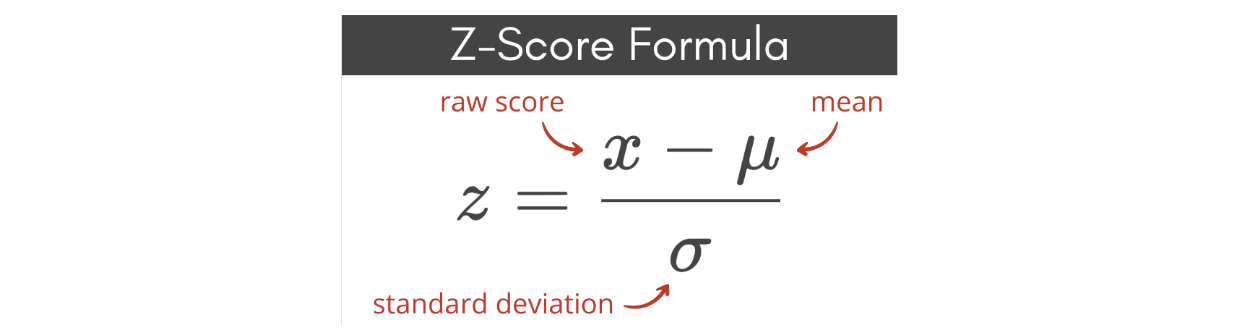

In [113]:
# returns A DataFrame that must have the same length as self. Standardization(mean 0 std 1) Normalization (0-1)
# z-score is is z = (x-μ)/σ, where x is the raw score, μ is the population mean, and σ is the population standard deviation.

df_num.transform(lambda x : (x-x.mean()) / x.std())

#(df_num-df_num.mean())/df_num.std()

# This is the dataframe we get after applying Transform function:

,var1,var2
0,-1.040605,-1.078044
1,-0.651625,-0.560989
2,-0.352409,-0.290633
3,-0.681547,-0.530573
4,-1.010684,-1.040870
5,1.622413,1.858697
6,0.934218,-0.047312
7,1.173590,0.537332
8,0.006649,1.152392


In [114]:
df_num.var1.transform(lambda x : (x-x.mean())/x.std())

0   -1.040605
1   -0.651625
2   -0.352409
3   -0.681547
4   -1.010684
5    1.622413
6    0.934218
7    1.173590
8    0.006649
Name: var1, dtype: float64

In [115]:
df_num.var1.transform(np.sqrt)
#np.sqrt(df_num.var1)
#df_num.var1.agg(np.sqrt)

0    3.162278
1    4.795832
2    5.744563
3    4.690416
4    3.316625
5    9.949874
6    8.717798
7    9.165151
8    6.708204
Name: var1, dtype: float64

In [116]:
df_num.var1.transform([np.sqrt, np.exp])
#df_num.var1.agg([np.sqrt, np.exp])

,sqrt,exp
0,3.162278,2.202647e+04
1,4.795832,9.744803e+09
2,5.744563,2.146436e+14
3,4.690416,3.584913e+09
4,3.316625,5.987414e+04
5,9.949874,9.889030e+42
6,8.717798,1.014800e+33
7,9.165151,3.025077e+36
8,6.708204,3.493427e+19


As seen above, transform comes in handy during feature extraction. As the name suggests, it enables us to extract new features from existing ones.

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.groupby().transform()</p>

<a id="3.3.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrameGroupBy.transform(func, *args, engine=None, engine_kwargs=None, **kwargs)``**
- Call function producing a like-indexed DataFrame on each group and return a DataFrame having the same indexes as the original object filled with the transformed values. [Official Pandas Document](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html).

In [117]:
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [118]:
df2.groupby("groups")["var1"].mean()

groups
A    36.000000
B    39.333333
C    59.000000
Name: var1, dtype: float64

In [119]:
df2.groupby("groups")["var1"].transform("mean")

0    36.000000
1    39.333333
2    59.000000
3    36.000000
4    39.333333
5    59.000000
6    36.000000
7    39.333333
8    59.000000
Name: var1, dtype: float64

In [120]:
df2["var1_mean_transform"] = df2.groupby("groups")["var1"].transform("mean")
df2

,groups,var1,var2,var1_mean_transform
0,A,10,100,36.000000
1,B,23,253,39.333333
2,C,33,333,59.000000
3,A,22,262,36.000000
4,B,11,111,39.333333
5,C,99,969,59.000000
6,A,76,405,36.000000
7,B,84,578,39.333333
8,C,45,760,59.000000


In [121]:
df2["var2_median_transform"] = df2.groupby("groups")["var2"].transform("median")
df2

,groups,var1,var2,var1_mean_transform,var2_median_transform
0,A,10,100,36.000000,262.0
1,B,23,253,39.333333,253.0
2,C,33,333,59.000000,760.0
3,A,22,262,36.000000,262.0
4,B,11,111,39.333333,253.0
5,C,99,969,59.000000,760.0
6,A,76,405,36.000000,262.0
7,B,84,578,39.333333,253.0
8,C,45,760,59.000000,760.0


In [122]:
df2

,groups,var1,var2,var1_mean_transform,var2_median_transform
0,A,10,100,36.000000,262.0
1,B,23,253,39.333333,253.0
2,C,33,333,59.000000,760.0
3,A,22,262,36.000000,262.0
4,B,11,111,39.333333,253.0
5,C,99,969,59.000000,760.0
6,A,76,405,36.000000,262.0
7,B,84,578,39.333333,253.0
8,C,45,760,59.000000,760.0


In [123]:
df2.var1.mean()

44.77777777777778

In [124]:
df2["var2_max_transform"] = df2.groupby("groups")["var2"].transform("max")
df2["var2_min_transform"] = df2.groupby("groups")["var2"].transform("min")
df2

,groups,var1,var2,var1_mean_transform,var2_median_transform,var2_max_transform,var2_min_transform
0,A,10,100,36.000000,262.0,405,100
1,B,23,253,39.333333,253.0,578,111
2,C,33,333,59.000000,760.0,969,333
3,A,22,262,36.000000,262.0,405,100
4,B,11,111,39.333333,253.0,578,111
5,C,99,969,59.000000,760.0,969,333
6,A,76,405,36.000000,262.0,405,100
7,B,84,578,39.333333,253.0,578,111
8,C,45,760,59.000000,760.0,969,333


In [125]:
df2

,groups,var1,var2,var1_mean_transform,var2_median_transform,var2_max_transform,var2_min_transform
0,A,10,100,36.000000,262.0,405,100
1,B,23,253,39.333333,253.0,578,111
2,C,33,333,59.000000,760.0,969,333
3,A,22,262,36.000000,262.0,405,100
4,B,11,111,39.333333,253.0,578,111
5,C,99,969,59.000000,760.0,969,333
6,A,76,405,36.000000,262.0,405,100
7,B,84,578,39.333333,253.0,578,111
8,C,45,760,59.000000,760.0,969,333


### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">.apply()</p>

<a id="3.4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

One alternative to using a loop to iterate over a DataFrame is to use the pandas **``.apply()``** method. This function acts as a **``map()``** function in Python. It takes a function as an input and applies this function to an entire DataFrame. **apply()** is used to apply a function along an axis of the DataFrame or on values of Series. In other words, ``Pandas.apply()``** allow the users to pass a function and apply it on **every single value** of the Pandas series. This function does **NOT** make changes to the original DataFrame object.

[SOUREC01](https://www.geeksforgeeks.org/python-pandas-apply/), [SOURCE02](https://www.datacamp.com/community/tutorials/pandas-apply) & [SOURCE03](https://sparkbyexamples.com/pandas/pandas-apply-function-usage-examples/)

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">Series.apply() - df["col"].apply()</p>

<a id="3.4.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``Series.apply(func, convert_dtype=True, args=(), **kwargs)``**
- Invoke function on values of Series.
- Can be ufunc (a NumPy function that applies to the entire Series) or a Python function that only works on single values.. [Official Pandas Document](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.Series.apply.html).

In [126]:
s = pd.Series([20, 21, 12], 
              index = ["London", "New York", "Helsinki"])
s

London      20
New York    21
Helsinki    12
dtype: int64

In [127]:
def square(x) :
    return x ** 2

s.apply(square)

London      400
New York    441
Helsinki    144
dtype: int64

In [128]:
s.apply(lambda x : x ** 2)

London      400
New York    441
Helsinki    144
dtype: int64

In [129]:
s.apply(np.log)

London      2.995732
New York    3.044522
Helsinki    2.484907
dtype: float64

In [130]:
[4, 9] * 3

[4, 9, 4, 9, 4, 9]

In [131]:
[[4, 9]] * 3

[[4, 9], [4, 9], [4, 9]]

In [132]:
df = pd.DataFrame([[4,9]] * 3, columns = ["A", "B"])

df

,A,B
0,4,9
1,4,9
2,4,9


In [133]:
df.apply(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [134]:
df.apply(np.sum, axis=0)

A    12
B    27
dtype: int64

In [135]:
df.apply(np.sum, axis=1)

0    13
1    13
2    13
dtype: int64

### applymap() örneği

In [136]:
df = pd.DataFrame([[1, 2.12], [3.356, 4.567]], columns=["A", "B"])
df

,A,B
0,1.000,2.120
1,3.356,4.567


In [137]:
df.applymap(lambda x: len(str(x)))

,A,B
0,3,4
1,5,5


In [138]:
df.apply(lambda x: len(str(x)))

A    45
B    45
dtype: int64

In [139]:
df.A

0    1.000
1    3.356
Name: A, dtype: float64

In [140]:
str(df.A)

'0    1.000\n1    3.356\nName: A, dtype: float64'

In [141]:
len(str(df.A))

45

In [142]:
df.applymap(lambda x : x**2)

,A,B
0,1.000000,4.494400
1,11.262736,20.857489


In [143]:
df ** 2

,A,B
0,1.000000,4.494400
1,11.262736,20.857489


In [144]:
df3 = pd.DataFrame({'col1':[1, 2, 3, 4],
                    'col2':[444, 555, 666, 444],
                    'col3':['abc', 'def', 'ghi', 'xyz']})
df3

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [145]:
def squared(x):
    return x**2

In [146]:
df3['col1'].apply(squared)

0     1
1     4
2     9
3    16
Name: col1, dtype: int64

In [147]:
df3['col2'].apply(np.log)

0    6.095825
1    6.318968
2    6.501290
3    6.095825
Name: col2, dtype: float64

In [148]:
df3['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [149]:
df3['col3'].apply(lambda x: x[0] * 3)

0    aaa
1    ddd
2    ggg
3    xxx
Name: col3, dtype: object

In [150]:
df3['col2'].apply(lambda x: "high" if x > 500 else "low")

0     low
1    high
2    high
3     low
Name: col2, dtype: object

In [151]:
df3["degree"] = df3['col2'].apply(lambda x: "high" if x > 500 else "low")
df3

,col1,col2,col3,degree
0,1,444,abc,low
1,2,555,def,high
2,3,666,ghi,high
3,4,444,xyz,low


# BURADA KALDIK

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.apply()</p>

<a id="3.4.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs)``**
- Returns Series or DataFrame
- Result of applying function along the given axis of the DataFrame. [Official Pandas Document](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html).

In [152]:
df2

,groups,var1,var2,var1_mean_transform,var2_median_transform,var2_max_transform,var2_min_transform
0,A,10,100,36.000000,262.0,405,100
1,B,23,253,39.333333,253.0,578,111
2,C,33,333,59.000000,760.0,969,333
3,A,22,262,36.000000,262.0,405,100
4,B,11,111,39.333333,253.0,578,111
5,C,99,969,59.000000,760.0,969,333
6,A,76,405,36.000000,262.0,405,100
7,B,84,578,39.333333,253.0,578,111
8,C,45,760,59.000000,760.0,969,333


In [153]:
df2.drop(["var1_mean_transform", "var2_median_transform", "var2_max_transform", "var2_min_transform"], axis=1, inplace=True)
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [154]:
df2 = df2[["groups", "var1", "var2"]]

In [155]:
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [156]:
# sum() functions works with putting + sign between each element of an iterable object

df2.apply(np.sum)

groups    ABCABCABC
var1            403
var2           3771
dtype: object

In [157]:
# It gives an error due to the non-numeric column : "groups"

# df2.apply(np.sum, axis=1)

In [158]:
df_num

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [159]:
df_num.apply(np.sum)

#df_num.sum()

var1     403
var2    3771
dtype: int64

In [160]:
df_num.apply(np.sum, axis=1)

#df_num.sum(axis=1)

0     110
1     276
2     366
3     284
4     122
5    1068
6     481
7     662
8     805
dtype: int64

In [161]:
df_num.apply(lambda x : x + 10)

,var1,var2
0,20,110
1,33,263
2,43,343
3,32,272
4,21,121
5,109,979
6,86,415
7,94,588
8,55,770


In [162]:
df_num.var1.apply(lambda x : (x*(9/5))+32)

0     50.0
1     73.4
2     91.4
3     71.6
4     51.8
5    210.2
6    168.8
7    183.2
8    113.0
Name: var1, dtype: float64

In [163]:
df_num.var1.transform(lambda x : (x*(9/5))+32)

0     50.0
1     73.4
2     91.4
3     71.6
4     51.8
5    210.2
6    168.8
7    183.2
8    113.0
Name: var1, dtype: float64

In [164]:
df2.groupby("groups").mean()

,var1,var2
groups,,
A,36.000000,255.666667
B,39.333333,314.000000
C,59.000000,687.333333


In [165]:
df2.groupby('groups').apply(np.mean)# var1 var2nin ortalamsini aldi

groups
A    145.833333
B    176.666667
C    373.166667
dtype: float64

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">DataFrame.applymap()</p>

<a id="3.5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrame.applymap(func, na_action=None, **kwargs)``**
- Apply a function to a Dataframe elementwise.
- This method applies a function that accepts and returns a scalar to every element of a DataFrame. [Official Pandas Document](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.applymap.html).

In [166]:
df_num

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [167]:
df_num.applymap(lambda x: x*5)

#df_num.apply(lambda x: x*5)
#df_num*5

,var1,var2
0,50,500
1,115,1265
2,165,1665
3,110,1310
4,55,555
5,495,4845
6,380,2025
7,420,2890
8,225,3800


In [168]:
df_num.applymap(lambda x: len(str(x)))

,var1,var2
0,2,3
1,2,3
2,2,3
3,2,3
4,2,3
5,2,3
6,2,3
7,2,3
8,2,3


In [169]:
df_num.apply(lambda x: len(str(x)))

var1     96
var2    105
dtype: int64

In [170]:
str(df_num.var2)

'0    100\n1    253\n2    333\n3    262\n4    111\n5    969\n6    405\n7    578\n8    760\nName: var2, dtype: int64'

In [171]:
for i in range(len(str(df_num.var1))):
    print(f"Eleman {i} : ", str(df_num.var1)[i])

Eleman 0 :  0
Eleman 1 :   
Eleman 2 :   
Eleman 3 :   
Eleman 4 :   
Eleman 5 :  1
Eleman 6 :  0
Eleman 7 :  

Eleman 8 :  1
Eleman 9 :   
Eleman 10 :   
Eleman 11 :   
Eleman 12 :   
Eleman 13 :  2
Eleman 14 :  3
Eleman 15 :  

Eleman 16 :  2
Eleman 17 :   
Eleman 18 :   
Eleman 19 :   
Eleman 20 :   
Eleman 21 :  3
Eleman 22 :  3
Eleman 23 :  

Eleman 24 :  3
Eleman 25 :   
Eleman 26 :   
Eleman 27 :   
Eleman 28 :   
Eleman 29 :  2
Eleman 30 :  2
Eleman 31 :  

Eleman 32 :  4
Eleman 33 :   
Eleman 34 :   
Eleman 35 :   
Eleman 36 :   
Eleman 37 :  1
Eleman 38 :  1
Eleman 39 :  

Eleman 40 :  5
Eleman 41 :   
Eleman 42 :   
Eleman 43 :   
Eleman 44 :   
Eleman 45 :  9
Eleman 46 :  9
Eleman 47 :  

Eleman 48 :  6
Eleman 49 :   
Eleman 50 :   
Eleman 51 :   
Eleman 52 :   
Eleman 53 :  7
Eleman 54 :  6
Eleman 55 :  

Eleman 56 :  7
Eleman 57 :   
Eleman 58 :   
Eleman 59 :   
Eleman 60 :   
Eleman 61 :  8
Eleman 62 :  4
Eleman 63 :  

Eleman 64 :  8
Eleman 65 :   
Eleman 66 :   
Elema

## Then what is the difference between applymap() & apply() ?

- **applymap()** is only available in DataFrame and used for element-wise operation across the whole DataFrame. It has been optimized and some cases work **much faster than apply()**

- **applymap()** method only works on a pandas dataframe where function is applied on every element individually. **apply()** method can be applied both to series and dataframes where **function can be applied both series and individual elements based on the type of function provided**.

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Series.map()</p>

<a id="3.6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``Series.map(arg, na_action=None)``**
- Map values of Series according to an input mapping or function.
- Used for substituting each value in a Series with another value, that may be derived from a function, a dict or a Series. [Official Pandas Document](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html).

***************************************************************************************************************************

- Python's **map()** is a built-in function that allows you to process and transform all the items in an iterable without using an explicit for loop, a technique commonly known as mapping.
- **map()** is useful when you need to apply a transformation function to each item in an iterable and transform them into a new iterable [Source](https://realpython.com/python-map-function/#:~:text=Python's%20map()%20is%20a,them%20into%20a%20new%20iterable.).

- The **map()** function is used to map values of Series according to input correspondence. Used for substituting each value in a Series with another value, that may be derived from a function, a dict or a Series.
- **map()** accepts a dict or a Series. Values that are not found in the dict are converted to NaN, unless the dict has a default value [Source](https://www.w3resource.com/pandas/series/series-map.php).

In [172]:
s = pd.Series(["cat", "dog", np.nan, "rabbit"])
s

0       cat
1       dog
2       NaN
3    rabbit
dtype: object

In [173]:
s.map({"cat": "kitten",
     "dog": "puppy"})

0    kitten
1     puppy
2       NaN
3       NaN
dtype: object

In [174]:
"I am a {}".format("rabbit")

'I am a rabbit'

In [175]:
s.map("I am a {}".format)

0       I am a cat
1       I am a dog
2       I am a nan
3    I am a rabbit
dtype: object

In [176]:
s.map("I am a {}".format, na_action = "ignore")

0       I am a cat
1       I am a dog
2              NaN
3    I am a rabbit
dtype: object

In [177]:
df3

,col1,col2,col3,degree
0,1,444,abc,low
1,2,555,def,high
2,3,666,ghi,high
3,4,444,xyz,low


In [178]:
df3.col1.map({1:"A", 2:"B"})

0      A
1      B
2    NaN
3    NaN
Name: col1, dtype: object

In [179]:
s = pd.Series(['fox', 'cow', np.nan, 'dog'])
s

0    fox
1    cow
2    NaN
3    dog
dtype: object

In [180]:
s.map('I am a {}'.format)

0    I am a fox
1    I am a cow
2    I am a nan
3    I am a dog
dtype: object

In [181]:
s.map('I am a {}'.format, na_action='ignore')

0    I am a fox
1    I am a cow
2           NaN
3    I am a dog
dtype: object

**apply()** is used to apply a function along an axis of the DataFrame or on values of Series.<br> 
**applymap()** is used to apply a function to a DataFrame elementwise.<br> 
**map()** is used to substitute each value in a Series with another value.

[SOURCE01](https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff#:~:text=apply()%20is%20used%20to,a%20Series%20with%20another%20value.), [SOURCE](https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas)

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">.transform() vs .apply()</p>

<a id="3.7"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### Similarties
- Both apply() and transform() can be used to manipulate the entire DataFrame.
- Both apply() and transform() support lambda expression.
- Both apply() and transform() can be used for manipulating a single column.

In [182]:
df5 = pd.DataFrame({'A': [1,2,3], 'B': [10,20,30] })
df5

,A,B
0,1,10
1,2,20
2,3,30


In [183]:
df5.apply(lambda x: x+10)
#df5.transform(lambda x: x+10)

,A,B
0,11,20
1,12,30
2,13,40


In [184]:
df5.transform(lambda x: x+10)

,A,B
0,11,20
1,12,30
2,13,40


In [185]:
df5['B_ap'] = df5['B'].apply(lambda x: x+10)
df5['B_tr'] = df5['B'].transform(lambda x: x+10)
df5

,A,B,B_ap,B_tr
0,1,10,20,20
1,2,20,30,30
2,3,30,40,40


In [213]:
import time

start = time.time()
for i in range(10000):
    df5['B'].apply(lambda x: (x+10)/(x**3))
print("apply took : ", (time.time() - start))

start = time.time()
for i in range(10000):
    df5['B'].transform(lambda x: (x+10)/(x**3))
print("transform took :", (time.time()-start))

apply took :  1.049201488494873
transform took : 1.1086599826812744


### Differences between .apply() and .transform() when manupulating data
- **transform()** cannot produce aggregated results.
- **apply()** works with multiple Series at a time. But, **transform()** is only allowed to work with a single Series at a time.

In [187]:
df5 = df5[["A", "B"]]
df5

,A,B
0,1,10
1,2,20
2,3,30


In [188]:
# (1) transform() cannot produce aggregated results.

df5.apply(lambda x: x.sum())

#df5.transform(lambda x:x.sum()) # gives an error

A     6
B    60
dtype: int64

In [189]:
# df5.transform(lambda x: x.sum())

In [190]:
df5

,A,B
0,1,10
1,2,20
2,3,30


In [191]:
# (2) apply() works with multiple Series at a time. But, transform() is only allowed to work with a single Series at a time

df5.apply(lambda x: x["B"]-x["A"], axis=1)

# df5.transform(lambda x: x["B"]-x["A"], axis=1) # gives an error

0     9
1    18
2    27
dtype: int64

### Differences Between .apply() and .transform() when using them in conjunction with groupby()
- **transform()** returns a DataFrame that has the same length as the input, but **apply()** cannot
- **apply()** works with multiple Series at a time. But, **transform()** is only allowed to work with a single Series at a time.

In [192]:
df6 = pd.DataFrame({'key': ['a','b','c'] * 3,
                    'A': np.arange(9),
                    'B': [1,2,3] * 3})
df6

,key,A,B
0,a,0,1
1,b,1,2
2,c,2,3
3,a,3,1
4,b,4,2
5,c,5,3
6,a,6,1
7,b,7,2
8,c,8,3


In [193]:
df6.groupby('key')['A'].sum()

key
a     9
b    12
c    15
Name: A, dtype: int32

In [194]:
df6.groupby('key')['A'].apply(lambda x: x.sum())

key
a     9
b    12
c    15
Name: A, dtype: int64

In [195]:
df6.groupby('key')['A'].transform(lambda x: x.sum())

0     9
1    12
2    15
3     9
4    12
5    15
6     9
7    12
8    15
Name: A, dtype: int64

In [196]:
df6.groupby('key')[['A', "B"]].transform(lambda x: x.sum())

,A,B
0,9,3
1,12,6
2,15,9
3,9,3
4,12,6
5,15,9
6,9,3
7,12,6
8,15,9


In [197]:
df6

,key,A,B
0,a,0,1
1,b,1,2
2,c,2,3
3,a,3,1
4,b,4,2
5,c,5,3
6,a,6,1
7,b,7,2
8,c,8,3


In [198]:
# (3) apply() works with multiple Series at a time. But, transform() is only allowed to work with a single Series at a time.

df6.groupby('key').apply(lambda x: (x["B"]-x["A"]).mean())

# df6.groupby('key').transform(lambda x: (x["B"]-x["A"]).mean()) # gives an error

key
a   -2.0
b   -2.0
c   -2.0
dtype: float64

In [199]:
# df6.groupby('key').transform(lambda x: (x["B"]-x["A"]).mean())

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">pivot() vs pivot_table()</p>

<a id="8"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**pivot_table()**
- pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True).
- Create a spreadsheet-style pivot table as a DataFrame.
- The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.

**pivot()**
- DataFrame.pivot(index=None, columns=None, values=None).
- Return reshaped DataFrame organized by given index / column values.
- Reshape data (produce a “pivot” table) based on column values. Uses unique values from specified index / columns to form axes of the resulting DataFrame.
- This function does not support data aggregation, multiple values will result in a MultiIndex in the columns.

**Differences**
- **Pivot_table** is a generalization of pivot that **CAN** handle **duplicate values** for one pivoted index/column pair. However, **pivot()** is used for pivoting without aggregation. Therefore, it **CANNOT** deal with duplicate values for one index/column pair.
- **Pivot_table** will only allow numeric types as "values=", whereas **pivot** will take string types as "values=".
- **Pivot_table** also supports using multiple columns for the index.<br> 
[SOURCE](https://www.quora.com/In-pandas-whats-the-difference-between-dataframe-pivot-and-dataframe-pivot_table)

In [214]:
data = {'gender':['male', 'female', 'female', 'male', 'female', 'male'],
        'sport':['tennis', 'tennis', 'basketball', 'football', 'voleyball', 'basketball'],
        'status':["professional","professional","professional","amateur","amateur","amateur"],
        'age':[20, 24, 26, 23, 22, 21],
        'height':[185, 172, 175, 178, 182, 196],
        'weight':[83, 58, 62, 80, 65, 90]}

df7 = pd.DataFrame(data)

df7

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,basketball,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [215]:
df7.pivot_table(index='gender',
                columns='sport',
                values=['age'],
                aggfunc='mean')

age                          
sport  basketball football tennis voleyball
gender                                     
female       26.0      NaN   24.0      22.0
male         21.0     23.0   20.0       NaN

In [202]:
df7.pivot(index='gender',
          columns='sport',
          values=['age'])

age                          
sport  basketball football tennis voleyball
gender                                     
female       26.0      NaN   24.0      22.0
male         21.0     23.0   20.0       NaN

**Let's see an example for same result**

In [203]:
df7.pivot_table(index='gender',
                columns='sport',
                values=['age','height','weight'],
                aggfunc='mean')

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female       26.0      NaN   24.0      22.0      175.0      NaN  172.0   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0       62.0      NaN   58.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

In [204]:
df7.pivot(index='gender',
          columns='sport',
          values=['age','height','weight'])

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female       26.0      NaN   24.0      22.0      175.0      NaN  172.0   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0       62.0      NaN   58.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

**Let's see a difference in terms of aggregate function**

**1. If we have categoric values for value parameter, we can use just "pivot" method.**

In [205]:
df7.pivot(index='gender',
          columns='sport',
          values='status')

sport,basketball,football,tennis,voleyball
gender,,,,
female,professional,NaN,professional,amateur
male,amateur,amateur,professional,NaN


In [206]:
#gives an error because no numeric types to aggregate
#df7.pivot_table(index='gender',
#                columns='sport',
#                values='status')

**2. If we have dublicate values in column selected for index parameter, we can use just "pivot_table" method.**

In [207]:
df7

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,basketball,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [208]:
df7.loc[2,"sport"] = "tennis"
df7

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,tennis,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [209]:
df7.pivot_table(index='gender',
                columns='sport',
                values=['age','height','weight'],
                aggfunc='mean')

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female        NaN      NaN   25.0      22.0        NaN      NaN  173.5   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0        NaN      NaN   60.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

In [210]:
#gives an error because of the dublicate values
#df7.pivot(index='gender',
#          columns='sport',
#          values=['age','height','weight'])

In [211]:
# if we want to get a result with pivot method, we have to remove index parameter

df7.pivot(columns='sport',
          values=['age','height','weight'])

age                               height                  \
sport basketball football tennis voleyball basketball football tennis   
0            NaN      NaN   20.0       NaN        NaN      NaN  185.0   
1            NaN      NaN   24.0       NaN        NaN      NaN  172.0   
2            NaN      NaN   26.0       NaN        NaN      NaN  175.0   
3            NaN     23.0    NaN       NaN        NaN    178.0    NaN   
4            NaN      NaN    NaN      22.0        NaN      NaN    NaN   
5           21.0      NaN    NaN       NaN      196.0      NaN    NaN   

                    weight                            
sport voleyball basketball football tennis voleyball  
0           NaN        NaN      NaN   83.0       NaN  
1           NaN        NaN      NaN   58.0       NaN  
2           NaN        NaN      NaN   62.0       NaN  
3           NaN        NaN     80.0    NaN       NaN  
4         182.0        NaN      NaN    NaN      65.0  
5           NaN       90.0      NaN    NaN       NaN

**We can get same results with both groupby and pivot_table**

In [212]:
df7.groupby(["gender","sport"]).mean()

TypeError: Could not convert professionalprofessional to numeric

In [ ]:
df7.pivot_table(index=['gender', 'sport'],
                #columns = "status",
                values=['age','height','weight'],
                aggfunc='mean')

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">.stack() & .unstack()</p>

<a id="9"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Reshape using **``stack()``** and **``unstack()``** function in Pandas python: Reshaping the data using **``stack()``** function in pandas converts the data into stacked format .i.e. the column is stacked row wise. When more than one column header is present we can stack the specific column header by specified the level. **``unstack()``** function in pandas converts the data into unstacked format [Source](https://www.datasciencemadesimple.com/reshape-using-stack-unstack-function-pandas-python/).

**Why and when should use a stack() and unstack() methods?**

[ANSWER](https://stackoverflow.com/questions/69139030/why-and-when-should-use-a-stack-and-unstack-methods)

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">.stack()</p>

<a id="9.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrame.stack(level=- 1, dropna=True)``**
- Stack the prescribed level(s) from columns to index.
- Return a reshaped DataFrame or Series having a multi-level index with one or more new inner-most levels compared to the current DataFrame.
- The new inner-most levels are created by pivoting the columns of the current dataframe:
    - if the columns have a single level, the output is a Series;
    - if the columns have multiple levels, the new index level(s) is (are) taken from the prescribed level(s) and the output is a DataFrame.

In [ ]:
df7

In [ ]:
df7["level"] = ["high", "high", "low", "high", "low", "low"]
df7

In [ ]:
df8 = df7.pivot_table(index=['gender','sport'],
                columns=["status","level"], 
                values=['age','height','weight'],
                aggfunc='mean')
df8

In [ ]:
df8.stack()

In [ ]:
# try "-1, -2, 0, 1, 2" as level parameter

df8.stack(level=-1)

In [ ]:
df8.stack(level=-1, dropna=False)

In [ ]:
df8.stack(level=-1, dropna=True)

In [ ]:
df8.stack(level=[-1, -2])

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">.unstack()</p>

<a id="9.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrame.unstack(level=- 1, fill_value=None)``**
- Pivot a level of the (necessarily hierarchical) index labels.
- Returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.
- If the index is not a MultiIndex, the output will be a Series.

**``unstack()``** function pivots a level of the (necessarily hierarchical) index labels, returning a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels [Source](https://www.w3resource.com/pandas/dataframe/dataframe-unstack.php).

In [ ]:
df8

In [ ]:
df8.unstack()

In [ ]:
# try "-1, 0, 1" as level parameter

df8.unstack(level=-1)

In [ ]:
df8.unstack(level=-1, fill_value="-") # Replace NaN with this value if the unstack produces missing values.

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of The Session - 05 & 06</p>

<a id="10"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

________